# Sampling

This notebook illustrates the different probability distributions that can be used to generate datasets of physical parameters.

In [1]:
import os
import sys

sys.path.insert(0, os.path.join(".."))

import numpy as np
import matplotlib.pyplot as plt

from infobs.sampling import samplers
from infobs.sampling import Mixture

## Predefined samplers

In [2]:
samplers.__all__ # Sampler is the abstract class from which all samplers inherit

['Sampler', 'Constant', 'Uniform', 'LogUniform', 'BoundedPowerLaw']

In [3]:
cst = samplers.Constant(1.)
cst.get(5)

array([1., 1., 1., 1., 1.])

In [4]:
unf = samplers.Uniform(0., 1.)
unf.get(5)

array([0.39079479, 0.026211  , 0.56833878, 0.19770359, 0.52410246])

In [5]:
logunf = samplers.LogUniform(1, 10)
logunf.get(5)

array([7.30769182, 4.33391842, 1.17338091, 4.69312246, 8.30467105])

In [6]:
bdpl = samplers.BoundedPowerLaw(0.5, 1, 10)
bdpl.get(5)

array([6.79175107, 3.53320021, 3.82415888, 4.71669006, 4.05413621])

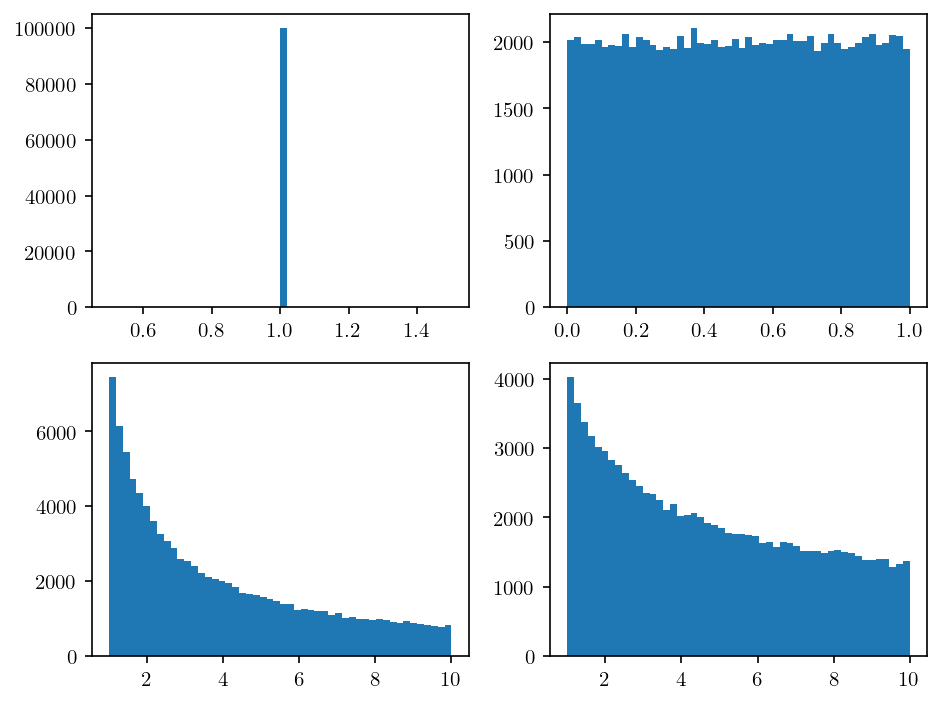

In [7]:
n_samples = 100_000
bins = 50

plt.figure(dpi=150)

plt.subplot(2, 2, 1)
x = cst.get(n_samples)
plt.hist(x, bins)

plt.subplot(2, 2, 2)
x = unf.get(n_samples)
plt.hist(x, bins)

plt.subplot(2, 2, 3)
x = logunf.get(n_samples)
plt.hist(x, bins)

plt.subplot(2, 2, 4)
x = bdpl.get(n_samples)
plt.hist(x, bins)

plt.tight_layout()
plt.show()

## New samplers from existing ones

In [8]:
bdpl2 = bdpl.copy_other_bounds(10, 100)
bdpl2.get(5)

array([26.80674634, 53.89577313, 13.49510575, 31.95299392, 40.06931273])

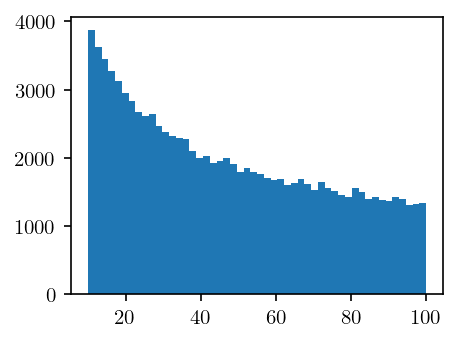

In [9]:
plt.figure(dpi=150, figsize=(0.5*6.4, 0.5*4.8))

x = bdpl2.get(n_samples)
plt.hist(x, bins)

plt.show()

## Defining your own samplers

In [10]:
class Exponential(samplers.Sampler):

    def __init__(self, lamda: float):
        """
        TODO
        """
        assert lamda > 0

        self.lamda = lamda

    def get(self, n: int) -> np.ndarray:
        """
        TODO
        """
        return np.random.exponential(self.lamda, n)

In [11]:
exp = Exponential(1.)
exp.get(5)

array([0.59646487, 1.16991262, 0.79159345, 0.16810737, 0.72334426])

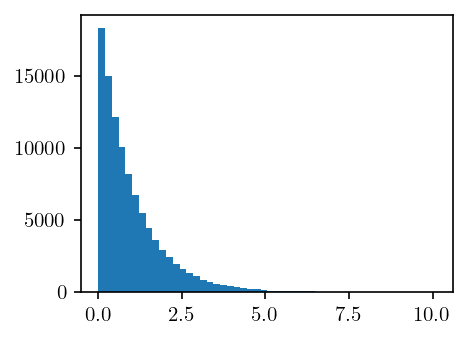

In [12]:
plt.figure(dpi=150, figsize=(0.5*6.4, 0.5*4.8))

x = exp.get(n_samples)
plt.hist(x, bins)

plt.show()

## Samplers mixture

In [32]:
mxt = Mixture(
    [unf, bdpl],
    [1, 5]
)

mxt.get(5)

array([4.05883558, 7.8928761 , 1.00402175, 9.12008436, 1.31337906])

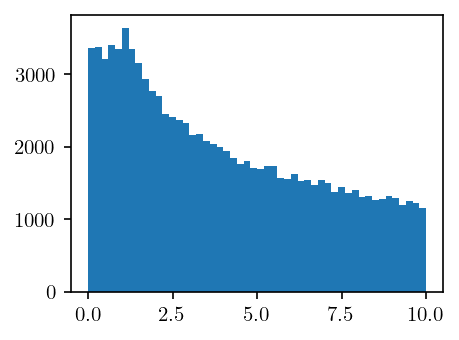

In [33]:
plt.figure(dpi=150, figsize=(0.5*6.4, 0.5*4.8))

x = mxt.get(n_samples)
plt.hist(x, bins)

plt.show()